In [39]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [23]:
df=pd.read_csv("garments_worker_productivity.csv",parse_dates=['date'])
df.set_index('date',inplace=True)

In [44]:
'''
01 date : Date in MM-DD-YYYY
02 day : Day of the Week
03 quarter : A portion of the month. A month was divided into four quarters
04 department : Associated department with the instance
05 team_no : Associated team number with the instance
06 no_of_workers : Number of workers in each team
07 no_of_style_change : Number of changes in the style of a particular product
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09 smv : Standard Minute Value, it is the allocated time for a task
10 wip : Work in progress. Includes the number of unfinished items for products
11 over_time : Represents the amount of overtime by each team in minutes
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13 idle_time : The amount of time when the production was interrupted due to several reasons
14 idle_men : The number of workers who were idle due to production interruption
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1. 
'''

'\n01 date : Date in MM-DD-YYYY\n02 day : Day of the Week\n03 quarter : A portion of the month. A month was divided into four quarters\n04 department : Associated department with the instance\n05 team_no : Associated team number with the instance\n06 no_of_workers : Number of workers in each team\n07 no_of_style_change : Number of changes in the style of a particular product\n08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.\n09 smv : Standard Minute Value, it is the allocated time for a task\n10 wip : Work in progress. Includes the number of unfinished items for products\n11 over_time : Represents the amount of overtime by each team in minutes\n12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.\n13 idle_time : The amount of time when the production was interrupted due to several reasons\n14 idle_men : The number of workers who were idle due to production interrupt

In [24]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 14 columns):
quarter                  1197 non-null object
department               1197 non-null object
day                      1197 non-null object
team                     1197 non-null int64
targeted_productivity    1197 non-null float64
smv                      1197 non-null float64
wip                      691 non-null float64
over_time                1197 non-null int64
incentive                1197 non-null int64
idle_time                1197 non-null float64
idle_men                 1197 non-null int64
no_of_style_change       1197 non-null int64
no_of_workers            1197 non-null float64
actual_productivity      1197 non-null float64
dtypes: float64(6), int64(5), object(3)
memory usage: 180.3+ KB


In [25]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [26]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [27]:
#there are 12 teams, the team could affect target
df['team'].unique()


array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

In [28]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [29]:
#remove the finishing with an extra space at the end
df['department']=df['department'].apply(lambda x: x.strip())

In [30]:
#removed error
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [31]:
df.isna().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<AxesSubplot:xlabel='date'>

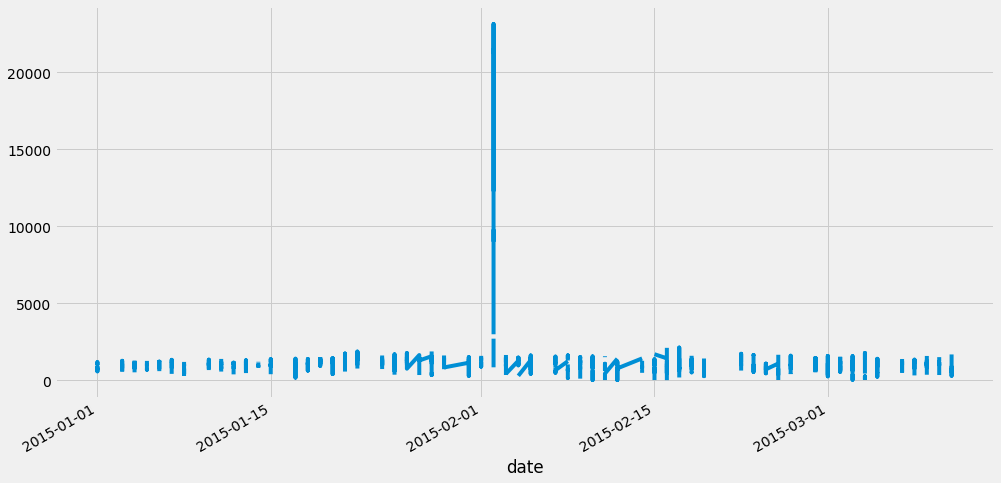

In [40]:
df['wip'].plot(figsize=(15,8))

In [35]:
new_df=df.interpolate()

<AxesSubplot:xlabel='date'>

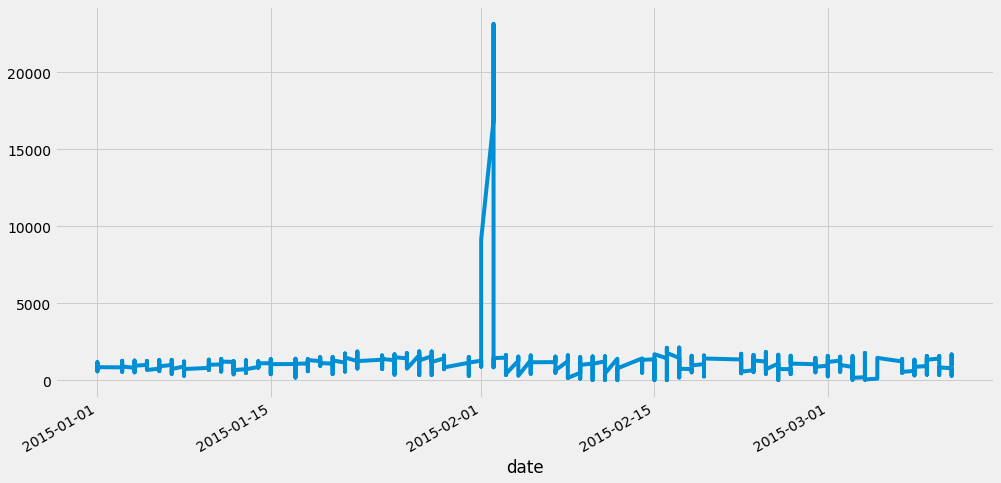

In [37]:
new_df['wip'].plot(figsize=(15,8))   

In [63]:
#separating categorical and numerical columns
cats=list(df.select_dtypes(include=['object']).columns)
num=list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables: {cats}')
print(f'numerical variables: {num}')

categorical variables: ['quarter', 'department', 'day']
numerical variables: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


In [64]:
#finding number of unique values in each column
df.nunique(axis=0)

quarter                    5
department                 2
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [65]:
df['targeted_productivity'].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.07, 0.4 ])

In [66]:
#team, targeted_productivity and no_of_style_change columns have very few unique columns, so we remove them from numerical columns and put into categorical columns
cats.extend(['team','targeted_productivity','no_of_style_change'])
num.remove('team')
num.remove('targeted_productivity')
num.remove('no_of_style_change')
print(f'categorical variables: {cats}')
print(f'numerical variables: {num}')

categorical variables: ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'no_of_style_change']
numerical variables: ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']


In [67]:
#finding null values in every column
df.isna().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [68]:
#wip has 506 null values.We cannot drop because it is significant number of rows.We interpolate the missing values in linear fashion
df.interpolate(inplace=True)

In [69]:
#no duplicate rows
df.duplicated().sum()

0

In [71]:
#bring the categorical columns together and the numerical columns together 
df=pd.concat((df[cats],df[num]),axis=1)
df.head()

,quarter,department,day,team,targeted_productivity,no_of_style_change,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,0,26.16,1108.0,7080,98,0.0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,0,3.94,1038.0,960,0,0.0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,0,11.41,968.0,3660,50,0.0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,0,11.41,968.0,3660,50,0.0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,0,25.90,1170.0,1920,50,0.0,0,56.0,0.800382


In [72]:
#removing extra spaces if any in columns having text, otherwise they will be considered as different values
for col in ['quarter','department','day']:
    df[col]=df[col].apply(lambda x:' '.join(x.split()))